In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xls=pd.ExcelFile("/content/AssignmentData.xlsx")

In [4]:
xls.sheet_names

['WorkerFunnel', 'ABTest']

In [5]:
ABTest=pd.read_excel(xls,sheet_name='ABTest')

In [6]:
ABTest.head(10)

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
5,2023-05-18,Laptop,fyttlyf/personal/product/digital-wallet-send-r...,289,875,Control
6,2023-05-18,Mobile,fyttlyf/business/product/business///,139,270,Experiment
7,2023-05-18,Other,fyttlyf/both/security/security-learn-about-fak...,7,74,Control
8,2023-05-18,Mobile,fyttlyf///extras-credit-card-benefits///,8,36,Control
9,2023-05-18,Laptop,fyttlyf/business/product/business-pos-system/p...,9,131,Control


In [7]:
ABTest.describe()

,Date,Clicks,Visitors
count,18099,18099.000000,18099.000000
mean,2023-05-15 09:33:19.602188032,62.600033,495.485441
min,2023-05-07 00:00:00,0.000000,0.000000
25%,2023-05-11 00:00:00,6.000000,21.000000
50%,2023-05-15 00:00:00,11.000000,33.000000
75%,2023-05-20 00:00:00,20.000000,97.000000
max,2023-05-24 00:00:00,11199.000000,211868.000000
std,NaN,377.536611,5704.920360


In [8]:
ABTest.isnull().sum()

Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64

In [10]:
import scipy.stats as stats

In [20]:
import scipy.stats as stats

MDE = 0.03
alpha = 0.05
power = 0.80
sample_size = 100
d =0.03 / (1 - 0.03) * (stats.norm.ppf(1 - 0.05/ 2) + stats.norm.ppf(0.80))
n = (2 * d / 0.05) ** 2
if n <= sample_size:
  print("We have sufficient sample size to conclude the test.")
else:
  print("We do not have sufficient sample size to conclude the test.")

We have sufficient sample size to conclude the test.


In [21]:
def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    control_rate = control_conversions / control_visitors
    treatment_rate = treatment_conversions / treatment_visitors
    z_score = calculate_z_score(confidence_level)
    margin_of_error = ((control_rate * (1 - control_rate) / control_visitors) +
                       (treatment_rate * (1 - treatment_rate) / treatment_visitors)) ** 0.5 * z_score
    delta = abs(control_rate - treatment_rate)
    if delta <= margin_of_error:
        return "Indeterminate"
    elif delta > margin_of_error and delta > 0:
        return "Experiment Group is Better"
    else:
        return "Control Group is Better"

In [22]:
def calculate_z_score(confidence_level):
    if confidence_level == 90:
        return 1.645
    elif confidence_level == 95:
        return 1.96
    elif confidence_level == 99:
        return 2.576
    else:
        raise ValueError("Invalid confidence level")

In [23]:
control_visitors_default = 1000
control_conversions_default = 200
treatment_visitors_default = 1000
treatment_conversions_default = 220
confidence_level_default = 95

In [24]:
result = a_b_test(1000, 105, 1500, 180, 95)
print(f"The result of the AB Test is: {result}")

The result of the AB Test is: Indeterminate


In [25]:
ABTest['Conversion_Rate'] = ABTest['Clicks'] / ABTest['Visitors']
abtest_grouped =ABTest.groupby(['Group', 'Device'])['Conversion_Rate'].mean().reset_index()
abtest_grouped

,Group,Device,Conversion_Rate
0,Control,Laptop,NaN
1,Control,Mobile,NaN
2,Control,Other,NaN
3,Control,Tablet,NaN
4,Experiment,Laptop,NaN
5,Experiment,Mobile,0.378512
6,Experiment,Other,NaN
7,Experiment,Tablet,0.563094


In [26]:
ABTest['Conversion_Rate'].isnull().sum()

0

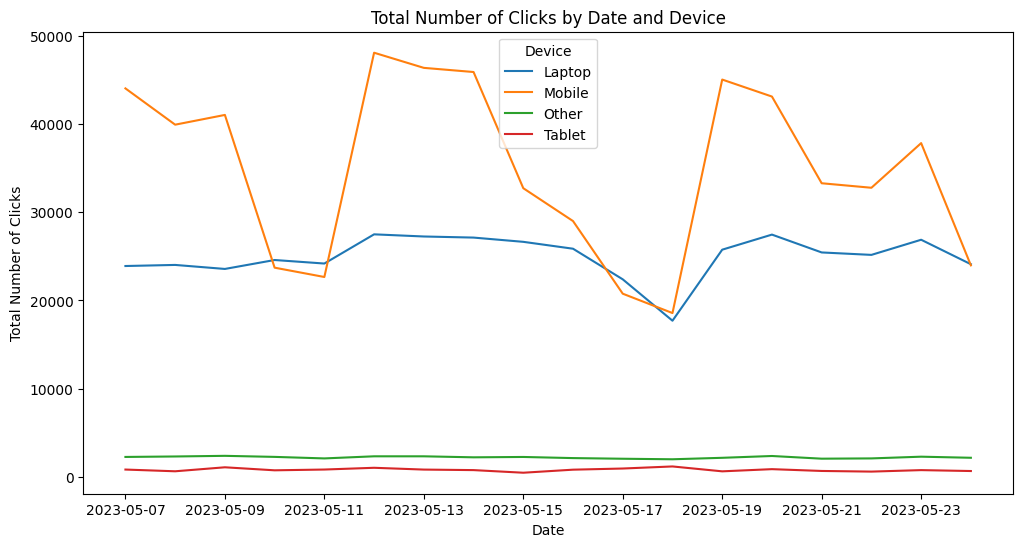

In [27]:
import seaborn as sns
abtest_clicks = ABTest.groupby(['Date', 'Device'])['Clicks'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Clicks', hue='Device', data=abtest_clicks)
plt.title('Total Number of Clicks by Date and Device')
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.show()

In [29]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [30]:
import streamlit as st
import numpy as np
from statsmodels.stats.power import TTestIndPower

In [31]:
st.set_page_config(page_title="AB Test Analysis", page_icon=":guardsman:", layout="wide")


In [32]:
st.title("AB Test Analysis")

2024-05-11 15:23:18.836 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [33]:
control_visitors = 1000
control_conversions = 200
treatment_visitors = 1000
treatment_conversions = 220
confidence_level = 95

In [34]:
control_visitors = st.number_input("Control Group Visitors", value=control_visitors)
control_conversions = st.number_input("Control Group Conversions", value=control_conversions)
treatment_visitors = st.number_input("Treatment Group Visitors", value=treatment_visitors)
treatment_conversions = st.number_input("Treatment Group Conversions", value=treatment_conversions)
confidence_level = st.selectbox("Confidence Level", [90, 95, 99])

2024-05-11 15:23:44.505 Session state does not function when running a script without `streamlit run`


In [35]:
def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    alpha = 1 - confidence_level / 100
    nobs1 = control_visitors
    nobs2 = treatment_visitors
    effect_size = TTestIndPower().solve_power(nobs1=nobs1, nobs2=nobs2, alpha=alpha)
    result = {
        "Control Conversion Rate": control_conversions / control_visitors,
        "Treatment Conversion Rate": treatment_conversions / treatment_visitors,
        "Statistical Power": 1 - TTestIndPower().power(effect_size=effect_size, nobs1=nobs1, alpha=alpha)
    }
    return result

In [36]:
if st.button("Perform AB Test"):
    result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
    st.write(result)